In [1]:
import requests


code = 'y8DgCLS6BERUvTEH'
url = f'https://www.geoguessr.com/api/v3/games/{code}'

response = requests.get(url=url)


In [2]:
data = response.json()

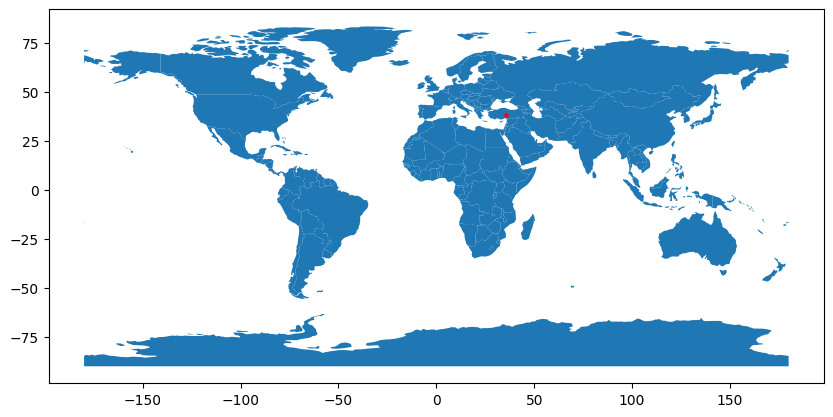

In [3]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


longlat = data['rounds'][data['round'] - 1]

lat = longlat['lat']
long = longlat['lng']



df = pd.DataFrame(columns=['Latitude','Longitude'],
                  data=[[lat, long]])

geometry = [Point(long, lat)]
gdf = GeoDataFrame(df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=5);
